# Model will be trained with RatingBased RatedOnly Data

RatingBased RatedOnly dataset contains continues rating value for each interacted pair

This is one of the best criterions for Like

Because it contains not only the information whether the movie is liked or not, but also how much it is liked

So it is one of the most useful datasets for the recommendation system

In this case, the problem turns into a regression problem

Therefore, the model to be used will also be converted to a regression model

In [1]:
#Importing libraries
import numpy as np
import pandas as pd
import tensorflow as tf
import warnings

In [2]:
#Printing library versions
print('numpy Version: ' + np.__version__)
print('pandas Version: ' + pd.__version__)
print('tensorflow Version: ' + tf.__version__)

numpy Version: 1.16.5
pandas Version: 0.25.1
tensorflow Version: 2.0.0


In [3]:
#GPU will be used for training
myGPU = tf.test.gpu_device_name()
if myGPU:
    print(myGPU)
else:
    print("Error")

/device:GPU:0


In [4]:
#Reading Qualified RatingBased RatedOnly training data from pkl file
trainingDf = pd.read_pickle("../Data/pkl/1M/Qualified/RatingBased/RatedOnly/Training.pkl")
trainingDf

,UserId,MovieId,Rating
0,3448,1096,0.666667
1,7042,465,0.777778
2,4214,3691,0.555556
3,9967,767,0.888889
4,324,1410,0.333333
...,...,...,...
753677,571,7554,0.333333
753678,4795,17048,0.333333
753679,3685,1941,0.555556
753680,1366,658,0.555556


In [5]:
#creating a user array for training input 
trainingUser = trainingDf[['UserId']].values.astype(np.int32)
trainingUser = trainingUser.reshape((trainingUser.shape[0]))
trainingUser

array([3448, 7042, 4214, ..., 3685, 1366, 8048])

In [6]:
#creating a movie array for training input 
trainingMovie = trainingDf[['MovieId']].values.astype(np.int32)
trainingMovie = trainingMovie.reshape((trainingMovie.shape[0]))
trainingMovie

array([1096,  465, 3691, ..., 1941,  658,  865])

In [7]:
#creating an array for training input 
trainingX = [trainingUser, trainingMovie]
trainingX

[array([3448, 7042, 4214, ..., 3685, 1366, 8048]),
 array([1096,  465, 3691, ..., 1941,  658,  865])]

In [8]:
#creating an array for training output 
trainingY = trainingDf[['Rating']].values.astype(np.float32)
trainingY = trainingY.reshape((trainingY.shape[0]))
trainingY

array([0.6666667, 0.7777778, 0.5555556, ..., 0.5555556, 0.5555556,
       0.7777778], dtype=float32)

In [9]:
#Clearing Memory
del trainingDf

In [10]:
#Reading Qualified RatingBased RatedOnly validation data from pkl file
validationDf = pd.read_pickle("../Data/pkl/1M/Qualified/RatingBased/RatedOnly/Validation.pkl")
validationDf

,UserId,MovieId,Rating
0,7981,215,0.777778
1,8165,3195,0.777778
2,5490,174,0.777778
3,5080,802,0.888889
4,7693,344,0.555556
...,...,...,...
123600,3821,265,0.888889
123601,2074,807,1.000000
123602,3930,1942,0.777778
123603,8844,1395,0.777778


In [11]:
#creating a user array for validation input 
validationUser = validationDf[['UserId']].values.astype(np.int32)
validationUser = validationUser.reshape((validationUser.shape[0]))
validationUser

array([7981, 8165, 5490, ..., 3930, 8844, 9284])

In [12]:
#creating a movie array for validation input 
validationMovie = validationDf[['MovieId']].values.astype(np.int32)
validationMovie = validationMovie.reshape((validationMovie.shape[0]))
validationMovie

array([ 215, 3195,  174, ..., 1942, 1395, 5107])

In [13]:
#creating an array for validation input 
validationX = [validationUser, validationMovie]
validationX

[array([7981, 8165, 5490, ..., 3930, 8844, 9284]),
 array([ 215, 3195,  174, ..., 1942, 1395, 5107])]

In [14]:
#creating an array for validation output 
validationY = validationDf[['Rating']].values.astype(np.float32)
validationY = validationY.reshape((validationY.shape[0]))
validationY

array([0.7777778, 0.7777778, 0.7777778, ..., 0.7777778, 0.7777778,
       0.7777778], dtype=float32)

In [15]:
#Clearing Memory
del validationDf

In [16]:
#Setting model variables
userSize = 10073
movieSize = 22033
latentDimensionMF = 4
latentDimensionMLP = 32
regMF = 0
regMLP = 0.01
regDense = 0.01
denseActivation = 'relu'

In [17]:
#Creating Neural Collaborative Filtering(NCF) model

#This Neural matrix factorization model based on https://arxiv.org/pdf/1708.05031.pdf
#As a result of the researches, it was determined as the most useful architecture
#This architecture will be trained with different data types and explanations will be made on the results. 


# input layer
userInput = tf.keras.layers.Input(shape = (), dtype = "int32", name = "userId")
movieInput = tf.keras.layers.Input(shape = (), dtype = "int32", name = "movieId")

# embedding layers
userEmbeddingMF = tf.keras.layers.Embedding(
    input_dim = userSize,
    output_dim = latentDimensionMF,
    name = 'userEmbeddingMF',
    embeddings_initializer = 'he_normal',
    embeddings_regularizer = tf.keras.regularizers.l2(regMF),
    input_length = 1,
)
movieEmbeddingMF = tf.keras.layers.Embedding(
    input_dim = movieSize,
    output_dim = latentDimensionMF,
    name = "movieEmbeddingMF",
    embeddings_initializer = "he_normal",
    embeddings_regularizer = tf.keras.regularizers.l2(regMF),
    input_length = 1,
)

userEmbeddingMLP = tf.keras.layers.Embedding(
    input_dim = userSize,
    output_dim = latentDimensionMLP,
    name = "userEmbeddingMLP",
    embeddings_initializer = "he_normal",
    embeddings_regularizer = tf.keras.regularizers.l2(regMLP),
    input_length = 1,
)
movieEmbeddingMLP = tf.keras.layers.Embedding(
    input_dim = movieSize,
    output_dim = latentDimensionMLP,
    name="movieEmbeddingMLP",
    embeddings_initializer = "he_normal",
    embeddings_regularizer = tf.keras.regularizers.l2(regMLP),
    input_length = 1,
)

# MF vector
userLatentMF = tf.keras.layers.Flatten()(userEmbeddingMF(userInput))
movieLatentMF = tf.keras.layers.Flatten()(movieEmbeddingMF(movieInput))
catLatentMF = tf.keras.layers.Multiply()([userLatentMF, movieLatentMF])

# MLP vector
userLatentMLP = tf.keras.layers.Flatten()(userEmbeddingMLP(userInput))
movieLatentMLP = tf.keras.layers.Flatten()(movieEmbeddingMLP(movieInput))
catLatentMLP = tf.keras.layers.Concatenate()([userLatentMLP, movieLatentMLP])

vectorMLP = catLatentMLP

layer = tf.keras.layers.Dense(
    32,
    activity_regularizer = tf.keras.regularizers.l2(regDense),
    activation = denseActivation,
    name = 'Dense1'
)

vectorMLP = layer(vectorMLP)

layer = tf.keras.layers.Dense(
    16,
    activity_regularizer = tf.keras.regularizers.l2(regDense),
    activation = denseActivation,
    name = 'Dense2'
)

vectorMLP = layer(vectorMLP)

predictLayer = tf.keras.layers.Concatenate()([catLatentMF, vectorMLP])

result = tf.keras.layers.Dense(1, activation="sigmoid", kernel_initializer="lecun_uniform", name="Like")

output = result(predictLayer)

model = tf.keras.models.Model(inputs = [userInput, movieInput], outputs = [output])

model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
userId (InputLayer)             [(None,)]            0                                            
__________________________________________________________________________________________________
movieId (InputLayer)            [(None,)]            0                                            
__________________________________________________________________________________________________
userEmbeddingMLP (Embedding)    (None, 32)           322336      userId[0][0]                     
__________________________________________________________________________________________________
movieEmbeddingMLP (Embedding)   (None, 32)           705056      movieId[0][0]                    
______________________________________________________________________________________________

In [18]:
#Compile model
#Since the dataset has a continuous rating score Mean Squared Error function will be used as loss function
#Metrics are also being changed as the problem turns into a regression problem
model.compile(
    optimizer = tf.keras.optimizers.Adam(),
    loss="mean_squared_error",
    metrics=[
        tf.keras.metrics.MeanSquaredError(name = 'mse'),
        tf.keras.metrics.RootMeanSquaredError(name = 'rmse'),
        tf.keras.metrics.MeanSquaredLogarithmicError(name = 'msle'),
        tf.keras.metrics.MeanAbsoluteError(name = 'mae'),
        tf.keras.metrics.MeanAbsolutePercentageError(name = 'mape')
    ])

In [19]:
#Defining CallBack class for save model
class ModelSaver(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        #calculation based on epoch + 1 Due to first epoch starts at 0
        if (epoch + 1) % 3 == 0:
            self.model.save("../Model/RatedOnlyModel/Model{}.h5".format(epoch + 1))

In [20]:
#ignore warnings due to Converting sparse IndexedSlices to a dense Tensor of unknown shape warning
warnings.filterwarnings('ignore')

#Fit the model
#RatingBased RatedOnly dataset contains continues rating value for each interacted pair
#In my opinion this is the best way to create prediction system
#So I will focus improve performance of this regression model
with tf.device('/GPU:0'):
    trainingHistory = model.fit(
        x = trainingX,
        y = trainingY,
        batch_size = 64,
        shuffle = True,
        callbacks=[ModelSaver()],
        epochs = 21,
        verbose = 1,
        validation_data = (validationX, validationY)
    )

Train on 753682 samples, validate on 123605 samples
Epoch 1/21
753682/753682 [==============================] - 179s 237us/sample - loss: 0.0626 - mse: 0.0461 - rmse: 0.2146 - msle: 0.0195 - mae: 0.1675 - mape: 9847556.0000 - val_loss: 0.0522 - val_mse: 0.0403 - val_rmse: 0.2006 - val_msle: 0.0172 - val_mae: 0.1543 - val_mape: 8619841.0000
Epoch 2/21
753682/753682 [==============================] - 236s 313us/sample - loss: 0.0431 - mse: 0.0378 - rmse: 0.1943 - msle: 0.0161 - mae: 0.1487 - mape: 8192790.0000 - val_loss: 0.0384 - val_mse: 0.0375 - val_rmse: 0.1938 - val_msle: 0.0159 - val_mae: 0.1480 - val_mape: 7592050.5000
Epoch 3/21
753682/753682 [==============================] - 240s 319us/sample - loss: 0.0364 - mse: 0.0349 - rmse: 0.1868 - msle: 0.0148 - mae: 0.1421 - mape: 7419713.5000 - val_loss: 0.0432 - val_mse: 0.0380 - val_rmse: 0.1948 - val_msle: 0.0159 - val_mae: 0.1495 - val_mape: 7050082.5000
Epoch 4/21
753682/753682 [==============================] - 240s 318us/sample 

In [21]:
#Checking Training history data
trainingHistory.history

{'loss': [0.06255025910333872,
  0.04311628627064262,
  0.03636692983038923,
  0.034378259752256606,
  0.033151210536908275,
  0.032443160696355965,
  0.03198245103144829,
  0.03160998111261064,
  0.03127848928085533,
  0.0310305165300723,
  0.03080638587189288,
  0.03071260213673237,
  0.0306035354170187,
  0.030414620168536816,
  0.030370635602102285,
  0.03022443229107803,
  0.030135488272432176,
  0.030058368174878516,
  0.029901288874898384,
  0.02979836731500512,
  0.02972457422366119],
 'mse': [0.04605231,
  0.037752666,
  0.03489387,
  0.0334752,
  0.032603364,
  0.03201376,
  0.031596273,
  0.031295195,
  0.031019865,
  0.030812282,
  0.030625537,
  0.030486012,
  0.030357247,
  0.03023473,
  0.030137096,
  0.030037116,
  0.029949773,
  0.029928954,
  0.029838461,
  0.029792387,
  0.029720847],
 'rmse': [0.21459801,
  0.19430046,
  0.186799,
  0.1829623,
  0.18056402,
  0.17892389,
  0.1777534,
  0.17690448,
  0.17612457,
  0.17553428,
  0.17500153,
  0.17460243,
  0.17423332,

In [22]:
#Import pyplot for graphics
from matplotlib import pyplot as plt

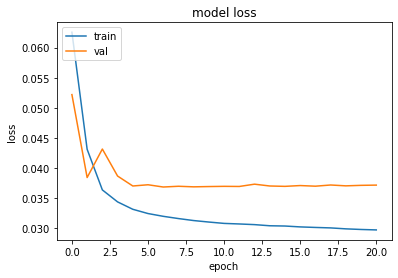

In [23]:
#Loss Graph
plt.plot(trainingHistory.history['loss'])
plt.plot(trainingHistory.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.ticklabel_format(useOffset=False)
plt.show()

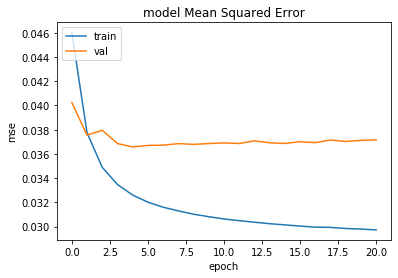

In [24]:
#MeanSquaredError Graph
plt.plot(trainingHistory.history['mse'])
plt.plot(trainingHistory.history['val_mse'])
plt.title('model Mean Squared Error')
plt.ylabel('mse')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.ticklabel_format(useOffset=False)
plt.show()

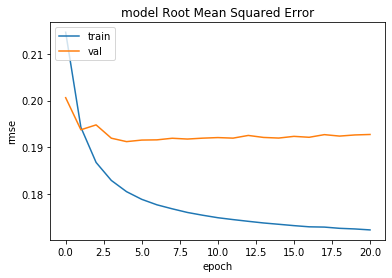

In [25]:
#RootMeanSquaredError Graph
plt.plot(trainingHistory.history['rmse'])
plt.plot(trainingHistory.history['val_rmse'])
plt.title('model Root Mean Squared Error')
plt.ylabel('rmse')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.ticklabel_format(useOffset=False)
plt.show()

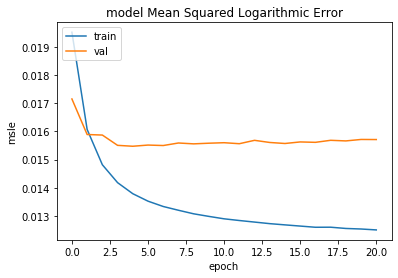

In [26]:
#MeanSquaredLogarithmicError Graph
plt.plot(trainingHistory.history['msle'])
plt.plot(trainingHistory.history['val_msle'])
plt.title('model Mean Squared Logarithmic Error')
plt.ylabel('msle')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.ticklabel_format(useOffset=False)
plt.show()

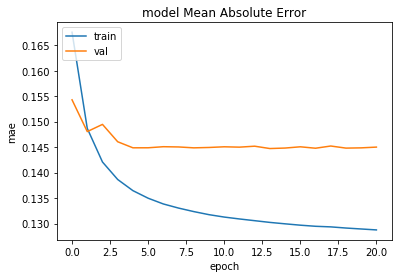

In [27]:
#MeanAbsoluteError Graph
plt.plot(trainingHistory.history['mae'])
plt.plot(trainingHistory.history['val_mae'])
plt.title('model Mean Absolute Error')
plt.ylabel('mae')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.ticklabel_format(useOffset=False)
plt.show()

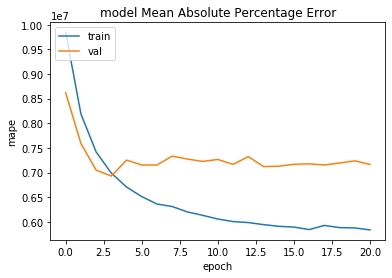

In [28]:
#MeanAbsolutePercentageError Graph
plt.plot(trainingHistory.history['mape'])
plt.plot(trainingHistory.history['val_mape'])
plt.title('model Mean Absolute Percentage Error')
plt.ylabel('mape')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.ticklabel_format(useOffset=False)
plt.show()

In [29]:
#Reading Qualified RatingBased RatedOnly test data from pkl file
testDf = pd.read_pickle("../Data/pkl/1M/Qualified/RatingBased/RatedOnly/Test.pkl")
testDf

,UserId,MovieId,Rating
0,2092,1440,0.777778
1,464,4450,0.777778
2,787,617,0.777778
3,3980,376,1.000000
4,3111,165,0.777778
...,...,...,...
123601,338,4367,0.000000
123602,4526,1536,0.777778
123603,8778,950,0.888889
123604,9104,674,0.888889


In [30]:
#creating a user array for test input 
testUser = testDf[['UserId']].values.astype(np.int32)
testUser = testUser.reshape((testUser.shape[0]))
testUser

array([2092,  464,  787, ..., 8778, 9104, 3898])

In [31]:
#creating a movie array for test input 
testMovie = testDf[['MovieId']].values.astype(np.int32)
testMovie = testMovie.reshape((testMovie.shape[0]))
testMovie

array([1440, 4450,  617, ...,  950,  674, 1336])

In [32]:
#creating an array for test input 
testX = [testUser, testMovie]
testX

[array([2092,  464,  787, ..., 8778, 9104, 3898]),
 array([1440, 4450,  617, ...,  950,  674, 1336])]

In [33]:
#creating an array for test output 
testY = testDf[['Rating']].values.astype(np.float32)
testY = testY.reshape((testY.shape[0]))
testY

array([0.7777778, 0.7777778, 0.7777778, ..., 0.8888889, 0.8888889,
       1.       ], dtype=float32)

In [34]:
#Clearing Memory
del testDf

In [35]:
#Model evaluating with test values
testResult = model.evaluate(x = testX, y = testY, batch_size = 64, verbose = 0)

In [36]:
#Print testResult for Last Model
testResult

[0.0372706268966982,
 0.037266865,
 0.19304627,
 0.015764818,
 0.14545813,
 7129479.5]

In [37]:
#Print Test Loss for Last Model
print("Test Loss: " + str(testResult[0]))

Test Loss: 0.0372706268966982


In [38]:
#Print Test Mse for Last Model
print("Test Mse: " + str(testResult[1]))

Test Mse: 0.037266865


In [39]:
#Print Test Rmse for Last Model
print("Test Rmse: " + str(testResult[2]))

Test Rmse: 0.19304627


In [40]:
#Print Test Msle for Last Model
print("Test Msle: " + str(testResult[3]))

Test Msle: 0.015764818


In [41]:
#Print Test Mae for Last Model
print("Test Mae: " + str(testResult[4]))

Test Mae: 0.14545813


In [42]:
#Print Test Mape for Last Model
print("Test Mape: " + str(testResult[5]))

Test Mape: 7129479.5


In [43]:
#When the metric graphs are examined, it is seen that the best model is reached between the 10th and 15th epochs.
#After the 15th epoch, the amount of performance does not seem to change much.
#After the 15th epoch, the model started to manage overfitting.
#So the model in the 15th epoch is determined as the best model.

#Model15 Loading from h5 file
model = tf.keras.models.load_model("../Model/RatedOnlyModel/Model15.h5")

In [44]:
#Best Model evaluating with test values
testResultBestModel = model.evaluate(x = testX, y = testY, batch_size = 64, verbose = 0)

In [45]:
#Print testResult for Best Model
testResultBestModel

[0.03714138613978981,
 0.037050717,
 0.19248563,
 0.015663018,
 0.14532414,
 7102044.0]

In [46]:
#Print Test Loss for Best Model
print("Test Loss: " + str(testResultBestModel[0]))

Test Loss: 0.03714138613978981


In [47]:
#Print Test Mse for Best Model
print("Test Mse: " + str(testResultBestModel[1]))

Test Mse: 0.037050717


In [48]:
#Print Test Rmse for Best Model
print("Test Rmse: " + str(testResultBestModel[2]))

Test Rmse: 0.19248563


In [49]:
#Print Test Msle for Best Model
print("Test Msle: " + str(testResultBestModel[3]))

Test Msle: 0.015663018


In [50]:
#Print Test Mae for Best Model
print("Test Mae: " + str(testResultBestModel[4]))

Test Mae: 0.14532414


In [51]:
#Print Test Mape for Best Model
print("Test Mape: " + str(testResultBestModel[5]))

Test Mape: 7102044.0


# Analysing Result

As can be seen above, the performance of the model obtained at the end of the trainingand the 15th model that chosen as the best model on the test data is almost equal

In this case, it is pointless to train the model further after the 15th epoch

Result look good

Dataset is usefull for recommendation system